In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

from google.colab import files
uploaded = files.upload()

Saving FYP_Data_updated-151.csv to FYP_Data_updated-151.csv


In [3]:
# Load and explore dataset
dataset = pd.read_csv('FYP_Data_updated-151.csv')  # Make sure file has 151 entries

In [4]:
print(dataset)

     No.             Name Gender  Age  Weight History  Meal/Fast Dia/Non  \
0      1          Samreen      F   21      56      No        2.0     Non   
1      2            Urwah      F   21      58     Yes        2.0     Non   
2      3            Anwar      M   22      66      No        2.0     Non   
3      4           Junaid      M   21      72     Yes        2.0     Non   
4      5             Anam      F   21      43      No        1.0     Non   
..   ...              ...    ...  ...     ...     ...        ...     ...   
148  149             Zain      M   36      77     Yes        0.0     Non   
149  150             Sami      M   37      78      No        2.0     Non   
150  151             Asif      M   38      79     Yes        1.0     Non   
151  152  Ghulam Mohiudin      M   52      62     Yes        2.5     Dia   
152  153            Aiman      F   22      47     Yes        0.5     Non   

     Thickness (cm)  Invasive  Non-Invasive  
0               4.8       124           1

In [5]:
# Drop unnecessary columns
dataset.drop(['No.', 'Name'], axis=1, inplace=True)

In [6]:
# Fill missing categorical data
dataset['Gender'].fillna('M', inplace=True)
dataset['Meal/Fast'].fillna('Two hours after lunch', inplace=True)

<ipython-input-6-a4ae31dd6e62>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna('M', inplace=True)
<ipython-input-6-a4ae31dd6e62>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [7]:
# Fill missing numeric data with median
dataset['Invasive'] = pd.to_numeric(dataset['Invasive'], errors='coerce')
dataset['Non-Invasive'] = pd.to_numeric(dataset['Non-Invasive'], errors='coerce')
dataset['Invasive'].fillna(dataset['Invasive'].median(), inplace=True)
dataset['Non-Invasive'].fillna(dataset['Non-Invasive'].median(), inplace=True)

<ipython-input-7-e2faff9b6dae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Invasive'].fillna(dataset['Invasive'].median(), inplace=True)
<ipython-input-7-e2faff9b6dae>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [8]:
# Encode categorical variables
dataset['Gender'] = dataset['Gender'].map({'M': 1, 'F': 2})
dataset['History'] = dataset['History'].map({'Yes': 1, 'No': 0})
dataset['Dia/Non'] = dataset['Dia/Non'].map({'Dia': 1, 'Non': 0})
dataset['Meal/Fast'] = pd.to_numeric(dataset['Meal/Fast'], errors='coerce')
dataset['Meal/Fast'].fillna(1.0, inplace=True)  # defaulting to "Two hours after lunch" equivalent

<ipython-input-8-bb206e65c97f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Meal/Fast'].fillna(1.0, inplace=True)  # defaulting to "Two hours after lunch" equivalent


In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
# Drop any remaining NaNs just in case
dataset.dropna(inplace=True)

In [11]:
print(dataset)

     Gender  Age  Weight  History  Meal/Fast  Dia/Non  Thickness (cm)  \
0         2   21      56        0        2.0      0.0             4.8   
1         2   21      58        1        2.0      0.0             4.8   
2         1   22      66        0        2.0      0.0             4.8   
3         1   21      72        1        2.0      0.0             5.5   
4         2   21      43        0        1.0      0.0             4.6   
..      ...  ...     ...      ...        ...      ...             ...   
148       1   36      77        1        0.0      0.0             5.5   
149       1   37      78        0        2.0      0.0             5.6   
150       1   38      79        1        1.0      0.0             5.3   
151       1   52      62        1        2.5      1.0             5.2   
152       2   22      47        1        0.5      0.0             4.3   

     Invasive  Non-Invasive  
0         124           166  
1         126           168  
2         107           131  
3  

In [12]:
# Print to verify
print("✅ Cleaned dataset (First 5 entries):")
print(dataset.head())
print("\n📊 Data Types:\n", dataset.dtypes)

✅ Cleaned dataset (First 5 entries):
   Gender  Age  Weight  History  Meal/Fast  Dia/Non  Thickness (cm)  Invasive  \
0       2   21      56        0        2.0      0.0             4.8       124   
1       2   21      58        1        2.0      0.0             4.8       126   
2       1   22      66        0        2.0      0.0             4.8       107   
3       1   21      72        1        2.0      0.0             5.5       114   
4       2   21      43        0        1.0      0.0             4.6       124   

   Non-Invasive  
0           166  
1           168  
2           131  
3            94  
4           174  

📊 Data Types:
 Gender              int64
Age                 int64
Weight              int64
History             int64
Meal/Fast         float64
Dia/Non           float64
Thickness (cm)    float64
Invasive            int64
Non-Invasive        int64
dtype: object


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


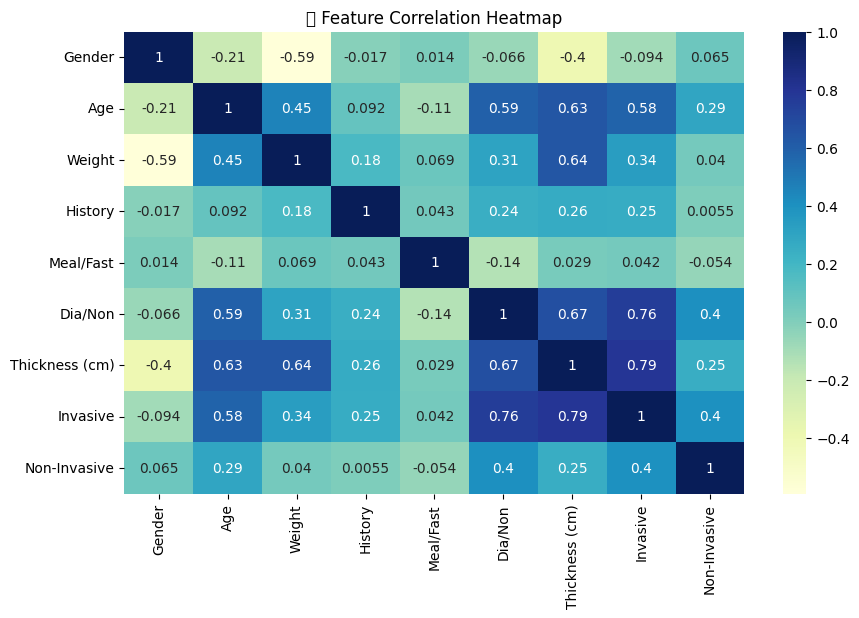

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(data=dataset.corr(), cmap="YlGnBu", annot=True)
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

In [14]:
# Split features and label
Y = dataset['Invasive']
X = dataset.drop(['Invasive'], axis=1)

In [15]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [17]:
# Build Neural Network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 55295.8555 - mae: 215.0252 - val_loss: 71352.0000 - val_mae: 232.2398
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52730.3086 - mae: 208.4046 - val_loss: 71117.8906 - val_mae: 231.7633
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52064.8906 - mae: 206.0984 - val_loss: 70846.0391 - val_mae: 231.2186
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 54298.6328 - mae: 211.8115 - val_loss: 70523.1484 - val_mae: 230.5743
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51841.0273 - mae: 211.0700 - val_loss: 70128.1406 - val_mae: 229.7900
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 44067.5039 - mae: 190.7791 - val_loss: 69633.1875 - val_mae: 228.8057
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52620.9453 - mae: 212.6201 - val_loss: 68988.4141 - val_mae: 227.5574
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 47490.8594 - mae: 200.5054 - val_loss: 68220.16

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


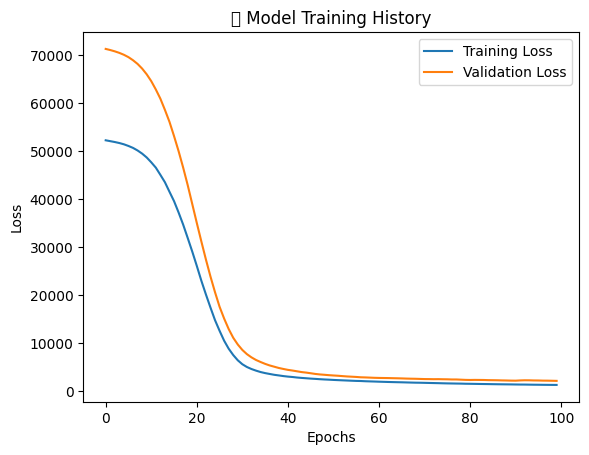

In [19]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("📉 Model Training History")
plt.show()

In [20]:
# Check training results
print("\n📉 Final training loss:", round(history.history['loss'][-1], 4))
print("📈 Final validation loss:", round(history.history['val_loss'][-1], 4))

# Sample prediction input
print("\nDataset columns for input order:")
print(X.columns.tolist())


📉 Final training loss: 1278.5459
📈 Final validation loss: 2124.5208

Dataset columns for input order:
['Gender', 'Age', 'Weight', 'History', 'Meal/Fast', 'Dia/Non', 'Thickness (cm)', 'Non-Invasive']


In [21]:
print(dataset)

     Gender  Age  Weight  History  Meal/Fast  Dia/Non  Thickness (cm)  \
0         2   21      56        0        2.0      0.0             4.8   
1         2   21      58        1        2.0      0.0             4.8   
2         1   22      66        0        2.0      0.0             4.8   
3         1   21      72        1        2.0      0.0             5.5   
4         2   21      43        0        1.0      0.0             4.6   
..      ...  ...     ...      ...        ...      ...             ...   
148       1   36      77        1        0.0      0.0             5.5   
149       1   37      78        0        2.0      0.0             5.6   
150       1   38      79        1        1.0      0.0             5.3   
151       1   52      62        1        2.5      1.0             5.2   
152       2   22      47        1        0.5      0.0             4.3   

     Invasive  Non-Invasive  
0         124           166  
1         126           168  
2         107           131  
3  

In [22]:
print(dataset.keys())

Index(['Gender', 'Age', 'Weight', 'History', 'Meal/Fast', 'Dia/Non',
       'Thickness (cm)', 'Invasive', 'Non-Invasive'],
      dtype='object')


In [23]:
# Predict on all 100 entries
y_all_pred = model.predict(X_scaled)

# Evaluation on all 100 entries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(Y, y_all_pred)
mse = mean_squared_error(Y, y_all_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y, y_all_pred)

print("\nModel Evaluation on ALL 100 entries:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy Measure): {r2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Model Evaluation on ALL 100 entries:
Mean Absolute Error (MAE): 25.16
Mean Squared Error (MSE): 1438.53
Root Mean Squared Error (RMSE): 37.93
R² Score (Accuracy Measure): 0.8543


In [24]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00


In [25]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from datetime import datetime

In [31]:
# IR Voltage to Non-Invasive Value
ir_voltage = float(input("Enter IR sensor voltage: "))
non_invasive = ir_voltage / 6
print(f"Calculated value from IR voltage: {non_invasive:.4f}")

print("\n📥 Enter New Patient Information (Use number codes as shown):")

print("Gender → Male: 1, Female: 2")
gender = int(input("Gender (1/2): "))

age = int(input("Age (in years): "))
weight = float(input("Weight (in kg): "))

print("History → Yes: 1, No: 0")
history = int(input("Any history of diabetes? (1/0): "))

print("Meal/Fast → Fasting: 0, Two hours after lunch: 1, Random: 2, or custom (e.g. 1.5, 2.5)")
meal_status = float(input("Meal status (e.g. 0/1/2 or 1.5): "))

print("Diabetic Status → Diabetic: 1, Non-Diabetic: 0")
diabetic_status = int(input("Diabetic status (1/0): "))

thickness = float(input("Finger thickness (in cm): "))

# Final input
user_input = [[gender, age, weight, history, meal_status, diabetic_status, thickness, non_invasive]]

# Scale and predict
user_scaled = scaler.transform(user_input)
predicted_glucose = model.predict(user_scaled)

# Show result
print("\n" + "="*40)
print("✅ Predicted Invasive Glucose Level:")
print(f"➡️  {predicted_glucose[0][0]:.2f} mg/dL")
print("="*40 + "\n")

Enter IR sensor voltage: 1028
Calculated value from IR voltage: 171.3333

📥 Enter New Patient Information (Use number codes as shown):
Gender → Male: 1, Female: 2
Gender (1/2): 1
Age (in years): 49
Weight (in kg): 110
History → Yes: 1, No: 0
Any history of diabetes? (1/0): 1
Meal/Fast → Fasting: 0, Two hours after lunch: 1, Random: 2, or custom (e.g. 1.5, 2.5)
Meal status (e.g. 0/1/2 or 1.5): 4
Diabetic Status → Diabetic: 1, Non-Diabetic: 0
Diabetic status (1/0): 0
Finger thickness (in cm): 5.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

✅ Predicted Invasive Glucose Level:
➡️  177.11 mg/dL



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
# Replace this with user input if needed
patient_name = input("Enter patient name: ")

# Path for PDF
pdf_filename = f"{patient_name.replace(' ', '_')}_Glucose_Report.pdf"

# Create canvas
c = canvas.Canvas(pdf_filename, pagesize=A4)
width, height = A4

# Header Section
c.setFont("Helvetica-Bold", 18)
c.drawCentredString(width / 2, height - 50, "University of Engineering and Technology, Lahore")

c.setFont("Helvetica-Bold", 14)
c.drawCentredString(width / 2, height - 80, "Department of Computer Engineering")

# Extra space before title
c.setFont("Helvetica-Bold", 16)
c.drawCentredString(width / 2, height - 130, "GlucoSense: Smart Non-Invasive Glucose Report")

# Date and Time
c.setFont("Helvetica", 10)
c.drawRightString(width - 40, height - 150, datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# Patient Information Section
c.setFont("Helvetica-Bold", 12)
c.drawString(40, height - 180, "📌 Patient Information:")
c.setFont("Helvetica", 12)

y = height - 200
c.drawString(60, y, f"Name: {patient_name}")
y -= 20
c.drawString(60, y, f"Gender (1 = Male, 2 = Female): {gender}")
y -= 20
c.drawString(60, y, f"Age: {age} years")
y -= 20
c.drawString(60, y, f"Weight: {weight} kg")
y -= 20
c.drawString(60, y, f"History of Diabetes (1 = Yes, 0 = No): {history}")
y -= 20
c.drawString(60, y, f"Meal Status (0 = Fasting, 1 = one hr after lunch, etc.): {meal_status}")
y -= 20
c.drawString(60, y, f"Diabetic Status (1 = Diabetic, 0 = Non-Diabetic): {diabetic_status}")
y -= 20
c.drawString(60, y, f"Finger Thickness: {thickness} cm")

# Prediction Section
y -= 40
c.setFont("Helvetica-Bold", 12)
c.drawString(40, y, "📊 Predicted Glucose Level:")
c.setFont("Helvetica", 12)
y -= 20
c.drawString(60, y, f"➡️  {predicted_glucose[0][0]:.2f} mg/dL")

# Footer
c.setFont("Helvetica-Oblique", 10)
c.drawCentredString(width / 2, 30, "This report is generated by a trained Neural Network Model")
c.drawCentredString(width / 2, 15, "Developed at UET Lahore, Dept. of Computer Engineering")

# Save PDF
c.save()

print(f"📄 PDF report generated: {pdf_filename}")

Enter patient name: Dr. Ali Hammad
📄 PDF report generated: Dr._Ali_Hammad_Glucose_Report.pdf
